mine

In [1]:
import pymysql as myDB
conn = myDB.connect('localhost', 'root', '')
cursor = conn.cursor()

In [7]:
sql='''UPDATE facts,methods
SET facts.Method_key = methods.method_key
WHERE facts.Method_Received = methods.Method;'''
cursor.execute(sql)

0

In [14]:
sql='SELECT method,count(*) as count FROM methods join facts on methods.method_key=facts.method_key group by method order by count desc;'
cursor.execute(sql)
databases = cursor.fetchall()
print (databases)

(('Phone', 286356), ('Spot311 Interface', 28955), ('Web', 20585), ('Mass Entry', 6436), ('Field Request', 2035), ('Open311', 185), ('E-Mail', 156), ('CSR - Follow On SR', 33), ('Field Reque', 31), ('Other', 9), ('Interface', 4), ('Mail', 3), ('Walk In', 2), ('CSR - Follo', 1), ('Radio', 1), ('Mobile Devi', 1), ('Social Media', 1))


In [31]:
import pandas as pd
import matplotlib.pyplot as mplt

In [15]:
database=pd.DataFrame(list(databases))
database

,0,1
0,Phone,286356
1,Spot311 Interface,28955
2,Web,20585
3,Mass Entry,6436
4,Field Request,2035
5,Open311,185
6,E-Mail,156
7,CSR - Follow On SR,33
8,Field Reque,31
9,Other,9


In [32]:
database.index=database[0]
database=database.drop(0,axis=1)
database

,1
0,
Phone,286356
Spot311 Interface,28955
Web,20585
Mass Entry,6436
Field Request,2035
Open311,185
E-Mail,156
CSR - Follow On SR,33
Field Reque,31


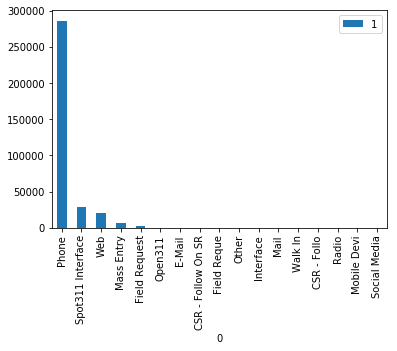

In [34]:
import matplotlib.pyplot as mplt
database.plot(kind='bar')
mplt.show()

In [51]:
sql='''SELECT method,year
FROM methods 
JOIN facts
ON methods.method_key=facts.method_key
JOIN hour
ON facts.status_change_date_key=hour.hour_key;'''
cursor.execute(sql)
table = cursor.fetchall()
table

(('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Entry', 2013),
 ('Mass Ent

In [52]:
%matplotlib inline
table=pd.DataFrame(list(table))
mlist = table[0].unique()
mlist

array(['Mass Entry', 'Phone', 'Web', 'E-Mail', 'Other', 'Field Request',
       'Field Reque', 'CSR - Follo', 'Mobile Devi', 'CSR - Follow On SR',
       'Mail', 'Interface', 'Spot311 Interface', 'Walk In', 'Open311',
       'Radio', 'Social Media'], dtype=object)

In [57]:
table.sample(15)

,0,1
153120,Phone,2015
321448,Phone,2017
115952,Phone,2015
35208,Phone,2014
318647,Phone,2017
228883,Spot311 Interface,2016
269256,Phone,2016
79065,Phone,2014
228075,Phone,2016
65713,Phone,2014


In [64]:
table.loc[table[0]=='Radio']

,0,1
101336,Radio,2015


In [72]:
dataframe_collection={}
dataframe_collection['Web']=table.loc[table[0]=='Web'].groupby(table[1]).count().drop(1,axis=1)

In [73]:
dataframe_collection['Web']

,0
1,
2014,5367
2015,6389
2016,5209
2017,3620


Mass Entry


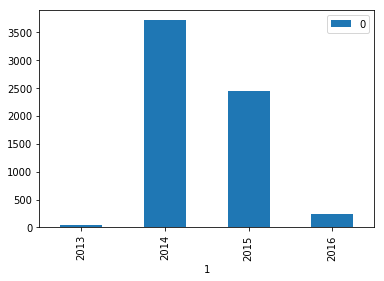



Phone


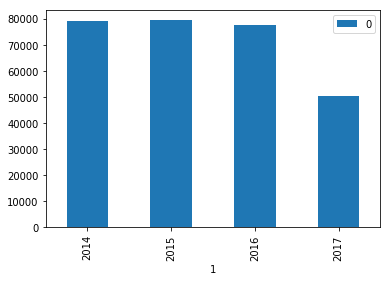



Web


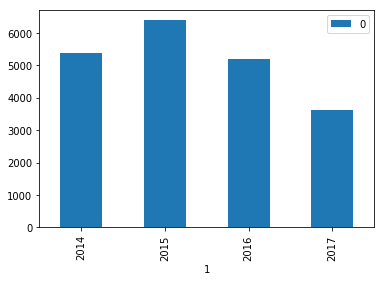



E-Mail


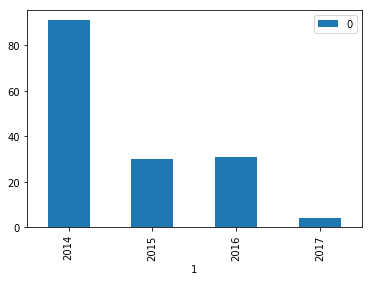



Other


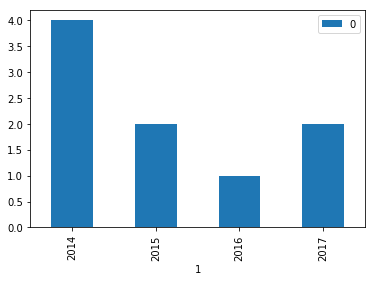



Field Request


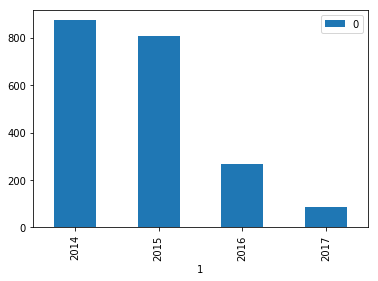



Field Reque


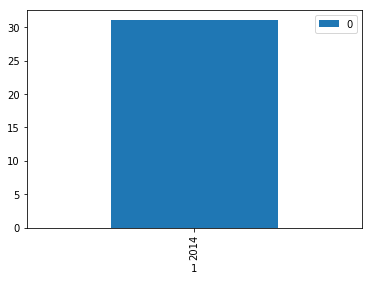



CSR - Follo


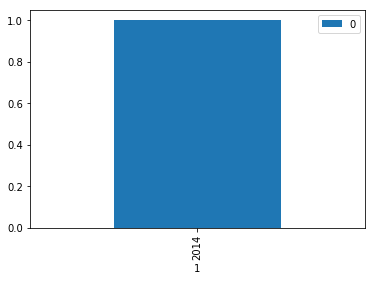



Mobile Devi


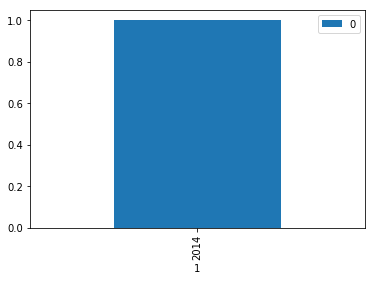



CSR - Follow On SR


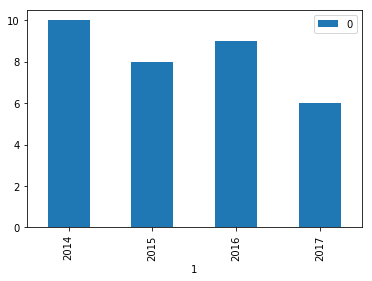



Mail


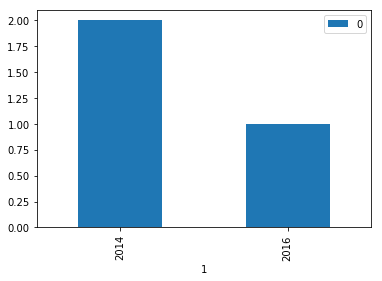



Interface


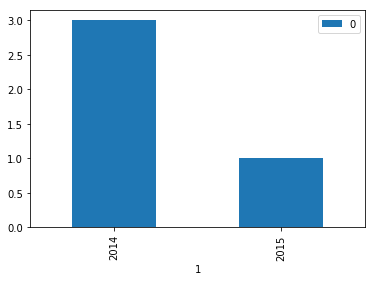



Spot311 Interface


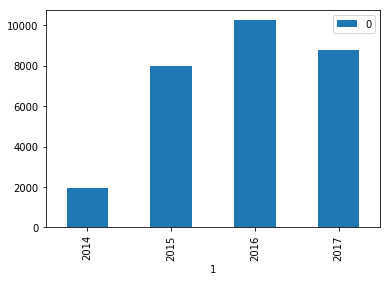



Walk In


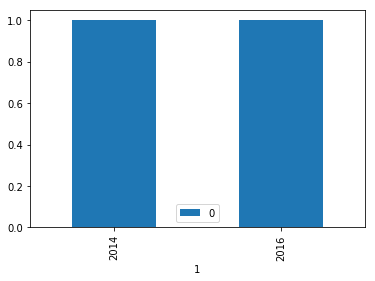



Open311


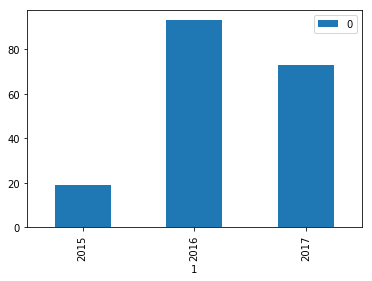



Radio


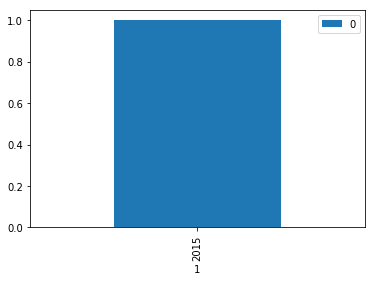



Social Media


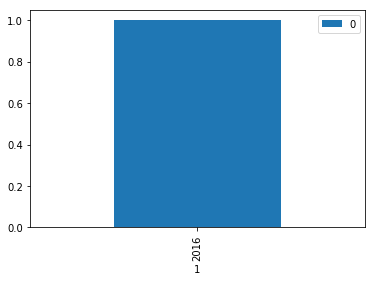

In [74]:
dataframe_collection={}
for i in mlist:
    print(i)
    dataframe_collection[i]=table.loc[table[0]==i].groupby(table[1]).count().drop(1,axis=1)
    dataframe_collection[i].plot(kind='bar')
    mplt.show()
    print('\n')


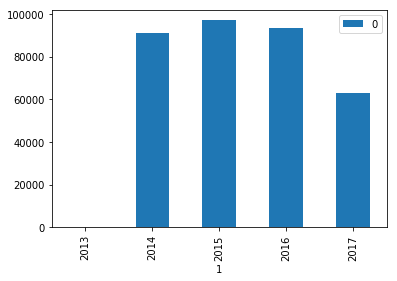

In [49]:
dataframe_collection['Radio'].plot(kind='bar')
mplt.show()

In [58]:
del table
cursor.close()